In [ ]:
# 한글폰트 사용 in colab
%matplotlib inline  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from scipy.stats import randint, uniform

import category_encoders as ce
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


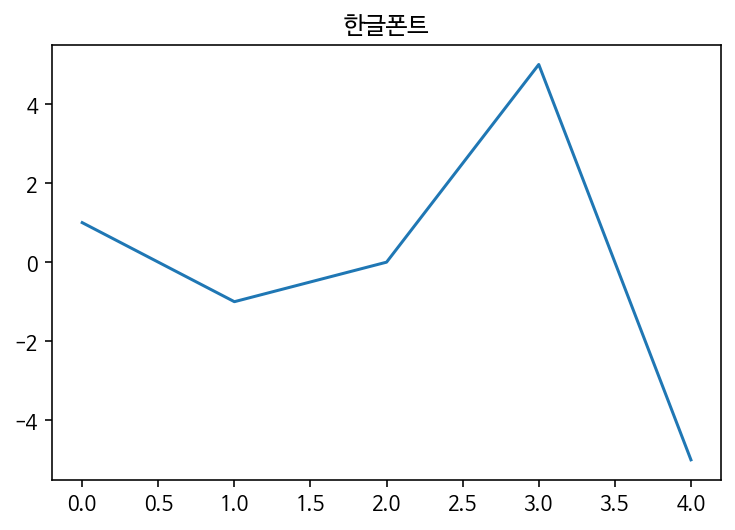

In [ ]:
# "Malgun Gothic"

# 한글폰트 설정 확인을 합니다.
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/csv파일/AID

/content/drive/MyDrive/Colab Notebooks/csv파일/AID


In [ ]:
from glob import glob
for filename in glob('*.csv'):
    print(filename)

2021년 7월.csv


# OZONE 데이터 (7월)

In [ ]:
ozone_data = pd.read_csv('2021년 7월.csv', encoding='UTF-8')

In [ ]:
print(ozone_data.shape)
ozone_data.head()

(447143, 12)


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2021070101,0.003,0.5,0.011,0.038,41.0,29.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2021070102,0.003,0.5,0.020,0.026,40.0,28.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2021070103,0.003,0.5,0.019,0.021,41.0,28.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2021070104,0.003,0.4,0.011,0.022,39.0,26.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2021070105,0.003,0.4,0.016,0.016,38.0,24.0,서울 중구 덕수궁길 15


In [ ]:
ozone_data.망.value_counts().index

Index(['도시대기', '도로변대기', '교외대기', '항만', '국가배경농도'], dtype='object')

**도시대기 측정망** : 도심(거주)지역의 평균대기질 농도 측정

**국가배경농도 측정망** : 국가의 배경농도를 파악하고 외국으로의 오염물질 유입, 유출상태 등을 파악

**교외대기 측정망** : 도시를 둘러싼 교외 지역의 배경농도 측정

**도로변대기 측정망** : 자동차 통행량과 유동인구가 많은 도로변 대기농도 측정

**항만 측정망**	: 항만지역 등의 대기질 현황 및 변화에 대한 실태조사

In [ ]:
ozone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447143 entries, 0 to 447142
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      447143 non-null  object 
 1   망       447143 non-null  object 
 2   측정소코드   447143 non-null  int64  
 3   측정소명    447143 non-null  object 
 4   측정일시    447143 non-null  int64  
 5   SO2     418573 non-null  float64
 6   CO      415717 non-null  float64
 7   O3      423309 non-null  float64
 8   NO2     419851 non-null  float64
 9   PM10    415683 non-null  float64
 10  PM25    409366 non-null  float64
 11  주소      447143 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 40.9+ MB


최종데이터에서 결측 처리

In [ ]:
ozone_data.isna().sum()

지역           0
망            0
측정소코드        0
측정소명         0
측정일시         0
SO2      28570
CO       31426
O3       23834
NO2      27292
PM10     31460
PM25     37777
주소           0
dtype: int64

# BVOC 데이터 (7월)

In [ ]:
bvoc_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv파일/산림청 국립산림과학원_청정넷_측정데이터_20211231/2021년7월지점별측정데이터.csv', encoding='cp949', engine='python')

In [ ]:
print(bvoc_data.shape)
bvoc_data.head()

(262331, 34)


,관측지점,관측시간,관측온도,관측습도,관측기압,관측풍속,관측풍향,관측최대풍속,관측미세먼지,관측초미세먼지,...,(BVOC)관측온도,(BVOC)관측습도,(BVOC)관측기압,(BVOC)관측풍속,(BVOC)관측풍향,(BVOC)관측최대풍속,(BVOC)관측미세먼지,(BVOC)관측초미세먼지,(BVOC)관측극초미세먼지,(BVOC)입자갯수
0,고매_150m,2021-07-01 00:00,21.6,98.5,1001.5,0.1,357.6,NaN,67.7,47.3,...,21.5,98.6,1001.5,0.0,358.2,NaN,20.3,11.3,10.3,17216.399;25097.005;29195.706;32888.304;21994....
1,고매_150m,2021-07-01 00:10,21.6,98.5,1001.4,0.1,347.1,NaN,67.8,47.3,...,21.5,98.6,1001.5,0.1,350.5,NaN,NaN,9.9,10.0,17814.680;26206.683;27705.701;30553.262;21112....
2,고매_150m,2021-07-01 00:20,21.4,98.6,1001.7,0.1,348.3,NaN,NaN,49.4,...,21.4,98.6,1001.7,0.1,347.9,NaN,NaN,NaN,NaN,19532.340;27793.807;33170.453;34748.755;24709....
3,고매_150m,2021-07-01 00:30,21.3,98.6,1001.9,0.0,0.0,NaN,NaN,47.1,...,21.3,98.6,1001.9,0.0,0.0,NaN,NaN,9.7,NaN,15604.913;23067.055;25051.363;27083.225;19370....
4,고매_150m,2021-07-01 00:40,21.4,98.5,1002.0,0.0,0.0,NaN,69.9,48.8,...,21.4,98.4,1002.0,0.0,355.7,NaN,NaN,11.4,10.4,17167.054;23894.253;27783.273;30476.950;21560....


### 파일 데이터명

산림청 국립산림과학원_청정넷
- 2021년7월 지점별 측정데이터 (10분 단위)

- 국립산림과학원에서 운영하는 청량 아시아 산림 미세먼지 측정넷(AICAN)은 산림 및 도시숲 내에 설치되어 산림의 화학 농도를 실시간으로 측정 및 분석하여 10분 단위로 국민들에게 정보를 제공하는 데이터입니다. (2021년 기준 상반기, 하반기)

국립환경과학원의 최종확정자료
- 2021년 7월 지역별 측정데이터 (1시간 단위)

---
---
---
---

# 1) 데이터 선정 이유 및 문제 정의 # ✅

**해당 데이터를 선정한 이유는 수목에서 방출되는 BVOC(생물 유래 휘발성 유기화합물)은 수목 스스로 스트레스에 대하여 방어하기 위한 역할을 합니다.**

**이러한 BVOC 물질 중 일부는 수목의 번식 및 생장을 조절하는 것뿐 아니라 인간의 건강 증진에 기여하는 것으로 알려져 있습니다.**

-

**휘발성 유기화합물(VOC)은 대류권 오존 및 2차 에어로졸의 형성을 위한 중요한 전구체입니다.**

**하지만 건강 위험과 환경 오염을 방지하기 위해서는 대기오염 물질의 전구체를 줄여야 합니다.**

**VOC의 상당 부분은 중부 유럽과 같이 인구가 밀집된 지역 생물(BVOC)에서 기원합니다.**

**대한민국 전체를 봐도 상당히 밀집지역이기 때문에 해당할 것 같습니다.**

# 2) 데이터를 이용한 가설 및 평가지표, 베이스라인 선택 # ✅

> 3) 글로벌 변화에 따른 예상 BVOC 배출량
BVOC 배출량에 대한 미래 기후 및 토지 사용 변화의 영향과 이들의
대기 화학 및 기후에 대한 피드백 반응을 평가하기 위한 모델이
필요하다. 이를 위해 아직 개발된 접근법은 거의 없다. 동적인 식생
모델과 결합할 때, 단위 잎 면적당 배출에 대한 직접적인 영향뿐만
아니라 식생 특성의 변화와 관련된 간접적 영향도 고려해야 한다는
것이 명백해진다. 따라서 종의 풍족도 및 식생 분포에 영향을 미치는
관리 결정은 BVOC 배출에 큰 영향을 미칠 것으로 예상한다.
https://www.konetic.or.kr/include/EUN_download.asp?str=DBSV_GREEN_REPORT&str2=2225

**위의 논문 내용을 보면 토지 사용변화나 식생 특성의 변화와 관련이 있을 수 있다고 합니다.**

**저는 토지사용관련 데이터는 찾아보지 않아서 위에 두 데이터로만 분석하겠습니다.**

**선형회귀모델를 사용할 것이고 평가지표는 MSE, RMSE, MAE, R2_score를 사용할 것입니다.**

**randomforestregressor 도 사용할 수 있는지 확인 해보겠습니다.**



---





> BVOC = 생물 유래 휘발성 유기화합물\
AVOC = 인공 유래 휘발성 유기화합물



산림 미세먼지 측정넷(AICAN)\
**산림 및 도시숲 내에 설치**되어 산림의 미세먼지 농도를 실시간으로 측정


BVOC(생물 유래 휘발성 유기화합물)측정은 산림\
AVOC(인공 유래 휘발성 유기화합물)측정은 도시숲 내에서 측정한 것으로 보임

---
---

BVOC를 제외한 나머지 특성들은 삭제하고 오존데이터를 날짜에 맞춰서 합쳐주겠습니다.

In [ ]:
bvoc_data = bvoc_data[['관측지점', '관측시간', '(BVOC)관측온도', '(BVOC)관측습도', '(BVOC)관측기압', '(BVOC)관측풍속'
       ,'(BVOC)관측풍향', '(BVOC)관측최대풍속', '(BVOC)관측미세먼지', '(BVOC)관측초미세먼지'
       ,'(BVOC)관측극초미세먼지', '(BVOC)입자갯수']]

BVOC데이터의 미세먼지는 ozone데이터에 있는 값으로 사용하겠습니다.

In [ ]:
bvoc_data.drop(bvoc_data[['(BVOC)관측미세먼지', '(BVOC)관측초미세먼지',
       '(BVOC)관측극초미세먼지']], axis=1, inplace=True)

입자갯수의 데이터 정보

In [ ]:
print(bvoc_data['(BVOC)입자갯수'][0])
print(bvoc_data['(BVOC)입자갯수'][1])
print(bvoc_data['(BVOC)입자갯수'][2])

17216.399;25097.005;29195.706;32888.304;21994.098;7624.015;12067.663;3315.438;583.101;525.328;71.475;0.000;0.000;0.000;0.000;30.087;50.019;33.634;30.320;8.708;6.226;1.967;0.328;0.164;0.000;0.000;0.000;0.000;0.000;0.000;0.000
17814.680;26206.683;27705.701;30553.262;21112.568;7149.356;11488.907;3134.823;670.356;444.823;40.847;14.344;10.205;0.000;0.000;0.000;17.806;20.672;26.128;11.200;3.257;1.308;0.492;0.000;0.000;0.000;0.000;0.000;0.000;0.000;0.000
19532.340;27793.807;33170.453;34748.755;24709.604;8478.059;13974.904;3608.976;796.967;532.063;129.577;54.808;17.336;0.000;19.429;67.664;54.054;45.937;45.557;16.317;4.577;1.631;0.984;0.492;0.000;0.000;0.000;0.000;0.000;0.000;0.000


알아볼 수 있게 변경

In [ ]:
split_num = [i.split(';') for i in bvoc_data['(BVOC)입자갯수']]
bvoc_data['(BVOC)입자갯수'] = [sum(pd.to_numeric(i)) for i in split_num]
bvoc_data['(BVOC)입자갯수'].head(5)

0    150739.985
1    146427.418
2    167804.291
3    130983.292
4    145611.052
Name: (BVOC)입자갯수, dtype: float64

최종데이터에서 결측 처리

In [ ]:
bvoc_data.isnull().sum()

관측지점                0
관측시간                0
(BVOC)관측온도        492
(BVOC)관측습도        492
(BVOC)관측기압        492
(BVOC)관측풍속        699
(BVOC)관측풍향        699
(BVOC)관측최대풍속    47165
(BVOC)입자갯수          0
dtype: int64

10분단위 bvoc데이터를 ozone데이터와 맞게 1시간단위로 만들어주겠습니다.

In [ ]:
def_data = bvoc_data.copy()

In [ ]:
def to_hourly_basis(data, loc):
    
    frame = pd.DataFrame()
    
    df = data.query("관측지점 == @loc")
    df['관측시간'] = pd.to_datetime(df['관측시간'])
    df = df.set_index('관측시간')
    frame['(BVOC)관측온도'] = df['(BVOC)관측온도'].resample('1H').mean()
    frame['(BVOC)관측습도'] = df['(BVOC)관측습도'].resample('1H').mean()
    frame['(BVOC)관측기압'] = df['(BVOC)관측기압'].resample('1H').mean()
    frame['(BVOC)관측풍속'] = df['(BVOC)관측풍속'].resample('1H').mean()
    frame['(BVOC)관측풍향'] = df['(BVOC)관측풍향'].resample('1H').mean()
    frame['(BVOC)관측최대풍속'] = df['(BVOC)관측최대풍속'].resample('1H').mean()
    frame['(BVOC)입자갯수'] = df['(BVOC)입자갯수'].resample('1H').mean()
    frame['관측지점'] = loc

    return frame

In [ ]:
def make_df(data):
    dataframe = to_hourly_basis(def_data, '광주_주거')
    for i in data['관측지점'].value_counts().index[1:]:
        dataframe = pd.concat([dataframe, to_hourly_basis(data, i)], axis=0)
    return dataframe

In [ ]:
def_data = make_df(def_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
bvoc_final = def_data.reset_index()

BVOC 데이터의 관측지점에는 어떤 곳이 있는지 살펴보았습니다.

In [ ]:
print('광주 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('광주')]['관측지점'].values))
print('고양 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('고양')]['관측지점'].values))
print('양재 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('양재')]['관측지점'].values))
print('관악 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('관악')]['관측지점'].values))
print('제주 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('제주')]['관측지점'].values))
print('울산 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('울산')]['관측지점'].values))
print('인천 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('인천')]['관측지점'].values))
print('남산 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('남산')]['관측지점'].values))
print('전주 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('전주')]['관측지점'].values))
print('시화 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('시화')]['관측지점'].values))
print('횡성 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('횡성')]['관측지점'].values))
print('고매 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('고매')]['관측지점'].values))
print('평창 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('평창')]['관측지점'].values))
print('홍릉 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('홍릉')]['관측지점'].values))
print('기장 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('기장')]['관측지점'].values))
print('태안 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('태안')]['관측지점'].values))
print('대전 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('대전')]['관측지점'].values))
print('대구 : ', np.unique(bvoc_final[bvoc_final['관측지점'].str.startswith('대구')]['관측지점'].values))

광주 :  ['광주_산단' '광주_숲' '광주_주거']
고양 :  ['고양_산단' '고양_숲' '고양_주거']
양재 :  ['양재_200m' '양재_300m' '양재_도로']
관악 :  ['관악_도심' '관악_숲' '관악_캠퍼스']
제주 :  ['제주_10m' '제주_20m' '제주_5m']
울산 :  ['울산_산단' '울산_숲' '울산_주거']
인천 :  ['인천_산단' '인천_주거' '인천_주거1' '인천_주거2' '인천_해안']
남산 :  ['남산_13.5m' '남산_25.5m' '남산_5m' '남산_고개' '남산_숲' '남산_자락']
전주 :  ['전주_산단' '전주_주거1' '전주_주거2']
시화 :  ['시화_산단' '시화_주거' '시화_차단숲']
횡성 :  ['횡성_20m' '횡성_30m' '횡성_5m']
고매 :  ['고매_150m' '고매_50m' '고매_도로']
평창 :  ['평창_20m' '평창_30m' '평창_5m']
홍릉 :  ['홍릉_도심' '홍릉_숲내부5m' '홍릉_숲외부20m']
기장 :  ['기장_산단' '기장_숲' '기장_주거']
태안 :  ['태안_산단' '태안_숲' '태안_주거']
대전 :  ['대전_산단' '대전_주거1' '대전_주거2']
대구 :  ['대구_강가' '대구_산단' '대구_주거']


In [ ]:
bvoc_final.shape

(44565, 9)

---
---
---
---
---
---

ozone데이터의 지역 리스트

In [ ]:
print('강원 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('강원')]['지역']), '\n')
print('경기 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('경기')]['지역']), '\n')
print('경남 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('경남')]['지역']), '\n')
print('경북 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('경북')]['지역']), '\n')
print('광주 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('광주')]['지역']), '\n')
print('대구 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('대구')]['지역']), '\n')
print('대전 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('대전')]['지역']), '\n')
print('부산 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('부산')]['지역']), '\n')
print('서울 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('서울')]['지역']), '\n')
print('울산 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('울산')]['지역']), '\n')
print('인천 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('인천')]['지역']), '\n')
print('전남 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('전남')]['지역']), '\n')
print('전북 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('전북')]['지역']), '\n')
print('제주 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('제주')]['지역']), '\n')
print('충남 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('충남')]['지역']), '\n')
print('충북 : ', np.unique(ozone_data[ozone_data['지역'].str.startswith('충북')]['지역']), '\n')

강원 :  ['강원 강릉시' '강원 고성군' '강원 동해시' '강원 삼척시' '강원 속초시' '강원 양구군' '강원 양양군' '강원 영월군'
 '강원 원주시' '강원 인제군' '강원 정선군' '강원 철원군' '강원 춘천시' '강원 태백시' '강원 평창군' '강원 홍천군'
 '강원 화천군' '강원 횡성군'] 

경기 :  ['경기 가평군' '경기 고양시' '경기 과천시' '경기 광명시' '경기 광주시' '경기 구리시' '경기 군포시' '경기 김포시'
 '경기 남양주시' '경기 동두천시' '경기 부천시' '경기 성남시' '경기 수원시' '경기 시흥시' '경기 안산시' '경기 안성시'
 '경기 안양시' '경기 양주시' '경기 양평군' '경기 여주시' '경기 연천군' '경기 오산시' '경기 용인시' '경기 의왕시'
 '경기 의정부시' '경기 이천시' '경기 파주시' '경기 평택시' '경기 포천시' '경기 하남시' '경기 화성시'] 

경남 :  ['경남 거제시' '경남 거창군' '경남 고성군' '경남 김해시' '경남 남해군' '경남 밀양시' '경남 사천시' '경남 산청군'
 '경남 양산시' '경남 의령군' '경남 진주시' '경남 창녕군' '경남 창원시' '경남 통영시' '경남 하동군' '경남 함안군'
 '경남 함양군' '경남 합천군'] 

경북 :  ['경북 경산시' '경북 경주시' '경북 고령군' '경북 구미시' '경북 군위군' '경북 김천시' '경북 문경시' '경북 봉화군'
 '경북 상주시' '경북 성주군' '경북 안동시' '경북 영덕군' '경북 영양군' '경북 영주시' '경북 영천시' '경북 예천군'
 '경북 울릉군' '경북 울진군' '경북 의성군' '경북 청도군' '경북 청송군' '경북 칠곡군' '경북 포항시'] 

광주 :  ['광주 광산구' '광주 남구' '광주 동구' '광주 북구' '광주 서구'] 

대구 :  ['대구 남구' '대구 달서구' '대구 달성군' '대구 동구' '대구 북구' '대구 서구' '대구 수성구' '대구 중구'] 

대전 :  ['대전

In [ ]:
# bvoc_final = bvoc_final.sort_values(by='관측지점')

10분단위에서 1시간 단위로 바꾼 bvoc데이터의 한 관측지점에 데이터 프레임 길이는 744이다

원래 1시간 단위였던 ozone데이터 지역의 데이터 프레임 길이도 744이다

정리해서 보면 744길이는 하나의 데이터 프레임으로 보고 bvoc데이터에 맞춰서 ozone데이터를 가져와서 순서에 맞게 만들어준다

고매를 예시로 들면 744길이의 고매는 3개가 있는 것이다

'고매_150m', '고매_50m', '고매_도로' = 고매 3개

---
광주 :  ['광주_산단', '광주_숲', '광주_주거'] = (광주_주거)길이가 1488이어서 2개 총 길이4\
고양 :  ['고양_산단', '고양_숲', '고양_주거'] = 3\
양재 :  ['양재_200m', '양재_300m', '양재_도로'] = 3\
관악 :  ['관악_도심', '관악_숲', '관악_캠퍼스'] = 3\
제주 :  ['제주_10m', '제주_20m', '제주_5m'] = 3\
울산 :  ['울산_산단', '울산_숲', '울산_주거'] = 3\
인천 :  ['인천_산단', '인천_주거', '인천_주거1', '인천_주거2', '인천_해안'] = 5\
남산 :  ['남산_13.5m', '남산_25.5m', '남산_5m', '남산_고개', '남산_숲', '남산_자락'] = 6\
전주 :  ['전주_산단', '전주_주거1', '전주_주거2'] = 3\
시화 :  ['시화_산단', '시화_주거', '시화_차단숲'] = 3\
횡성 :  ['횡성_20m', '횡성_30m', '횡성_5m'] = 3\
고매 :  ['고매_150m', '고매_50m', '고매_도로'] = 3\
평창 :  ['평창_20m', '평창_30m', '평창_5m'] = 3\
홍릉 :  ['홍릉_도심', '홍릉_숲내부5m', '홍릉_숲외부20m'] = 3\
기장 :  ['기장_산단', '기장_숲', '기장_주거'] = 3\
태안 :  ['태안_산단', '태안_숲', '태안_주거'] = 3\
대전 :  ['대전_산단', '대전_주거1', '대전_주거2'] = 3\
대구 :  ['대구_강가', '대구_산단', '대구_주거'] = 3

BVOC 데이터를 ['관측지점'] 기준으로 ozone데이터의 ['지역']을 찾아서 데이터 길이에 맞게 만들어 주었다.

관측지점과 가까운 지역 찾기

고양_산단 730 lenght

홍릉_숲외부20m 683 lenght

In [ ]:
bvoc_final.관측지점.unique()

array(['광주_주거', '양재_200m', '양재_300m', '울산_주거', '횡성_30m', '시화_산단', '남산_자락',
       '대구_산단', '남산_고개', '인천_산단', '대전_산단', '울산_숲', '인천_주거', '광주_산단',
       '인천_주거2', '횡성_5m', '전주_산단', '전주_주거1', '전주_주거2', '제주_20m', '태안_산단',
       '제주_10m', '시화_주거', '제주_5m', '양재_도로', '시화_차단숲', '대구_주거', '기장_주거',
       '기장_숲', '기장_산단', '관악_캠퍼스', '관악_숲', '관악_도심', '대전_주거2', '고양_숲',
       '태안_숲', '대전_주거1', '인천_주거1', '태안_주거', '울산_산단', '남산_13.5m', '고양_주거',
       '남산_숲', '남산_5m', '횡성_20m', '남산_25.5m', '인천_해안', '광주_숲', '고매_50m',
       '홍릉_도심', '홍릉_숲내부5m', '고매_도로', '고양_산단', '고매_150m', '홍릉_숲외부20m',
       '평창_5m', '평창_30m', '평창_20m', '대구_강가'], dtype=object)

In [ ]:
# 지역별 측정소명 ex) BVOC 관측지점의 인천
print(ozone_data.query('지역 == "인천 계양구"').측정소명.value_counts())
print()
print(ozone_data.query('지역 == "서울 동대문구"').측정소명.value_counts())

계산    744
Name: 측정소명, dtype: int64

동대문구    744
홍릉로     744
Name: 측정소명, dtype: int64


In [ ]:
# 관측지점 = 가까운 지역
광주_a = ozone_data.query('지역 == "광주 북구" & 측정소명 == ["두암동"]')
광주_b = ozone_data.query('지역 == "광주 남구" & 측정소명 == ["주월동"]')
양재_a = ozone_data.query('지역 == "서울 서초구" & 측정소명 == ["서초구"]')
양재_b = ozone_data.query('지역 == "서울 서초구" & 측정소명 == ["강남대로"]')
울산_a = ozone_data.query('지역 == "울산 동구" & 측정소명 == ["대송동"]')
횡성_a = ozone_data.query('지역 == "강원 횡성군" & 측정소명 == ["치악산"]')
시화_a = ozone_data.query('지역 == "경기 시흥시" & 측정소명 == ["정왕동"]')
남산_a = ozone_data.query('지역 == "서울 중구" & 측정소명 == ["중구"]')
대구_a = ozone_data.query('지역 == "대구 중구" & 측정소명 == ["수창동"]')
남산_b = ozone_data.query('지역 == "서울 중구" & 측정소명 == ["청계천로"]')
인천_a = ozone_data.query('지역 == "인천 미추홀구" & 측정소명 == ["숭의"]')
대전_a = ozone_data.query('지역 == "대전 중구" & 측정소명 == ["문창동"]')
울산_b = ozone_data.query('지역 == "울산 동구" & 측정소명 == ["전하동"]')
인천_b = ozone_data.query('지역 == "인천 미추홀구" & 측정소명 == ["석바위"]')
광주_c = ozone_data.query('지역 == "광주 서구" & 측정소명 == ["농성동"]')
인천_c = ozone_data.query('지역 == "인천 미추홀구" & 측정소명 == ["주안"]')
횡성_b = ozone_data.query('지역 == "강원 횡성군" & 측정소명 == ["횡성읍"]')
전주_a = ozone_data.query('지역 == "전북 전주시" & 측정소명 == ["삼천동"]')
전주_b = ozone_data.query('지역 == "전북 전주시" & 측정소명 == ["서신동"]')
전주_c = ozone_data.query('지역 == "전북 전주시" & 측정소명 == ["송천동"]')
제주_a = ozone_data.query('지역 == "제주 제주시" & 측정소명 == ["이도동"]')
태안_a = ozone_data.query('지역 == "충남 태안군" & 측정소명 == ["태안읍"]')
제주_b = ozone_data.query('지역 == "제주 제주시" & 측정소명 == ["연동"]')
시화_b = ozone_data.query('지역 == "경기 시흥시" & 측정소명 == ["시화산단"]')
제주_c = ozone_data.query('지역 == "제주 제주시" & 측정소명 == ["고산리"]')
양재_c = ozone_data.query('지역 == "경기 과천시" & 측정소명 == ["과천동"]')
시화_c = ozone_data.query('지역 == "경기 시흥시" & 측정소명 == ["서해안로"]')
대구_b = ozone_data.query('지역 == "대구 서구" & 측정소명 == ["이현동"]')
기장_a = ozone_data.query('지역 == "부산 기장군" & 측정소명 == ["기장읍"]')
기장_b = ozone_data.query('지역 == "부산 기장군" & 측정소명 == ["좌동"]')
기장_c = ozone_data.query('지역 == "부산 기장군" & 측정소명 == ["용수리"]')
관악_a = ozone_data.query('지역 == "서울 관악구" & 측정소명 == ["관악구"]')
관악_b = ozone_data.query('지역 == "서울 동작구" & 측정소명 == ["동작구"]')
관악_c = ozone_data.query('지역 == "서울 동작구" & 측정소명 == ["동작대로 중앙차로"]')
대전_b = ozone_data.query('지역 == "대전 유성구" & 측정소명 == ["구성동"]')
고양_a = ozone_data.query('지역 == "경기 고양시" & 측정소명 == ["행신동"]') 
태안_b = ozone_data.query('지역 == "충남 태안군" & 측정소명 == ["원북면"]')
대전_c = ozone_data.query('지역 == "대전 동구" & 측정소명 == ["대성동"]')
인천_d = ozone_data.query('지역 == "인천 계양구" & 측정소명 == ["계산"]')
태안_c = ozone_data.query('지역 == "충남 태안군" & 측정소명 == ["이원면"]')
울산_c = ozone_data.query('지역 == "울산 중구" & 측정소명 == ["약사동"]')
남산_c = ozone_data.query('지역 == "서울 용산구" & 측정소명 == ["한강대로"]')
고양_b = ozone_data.query('지역 == "경기 고양시" & 측정소명 == ["식사동"]') 
남산_d = ozone_data.query('지역 == "서울 용산구" & 측정소명 == ["용산구"]')
남산_e = ozone_data.query('지역 == "서울 서대문구" & 측정소명 == ["서대문구"]')
횡성_c = ozone_data.query('지역 == "강원 원주시" & 측정소명 == ["중앙동(강원)"]')
남산_f = ozone_data.query('지역 == "서울 마포구" & 측정소명 == ["마포구"]')
인천_e = ozone_data.query('지역 == "인천 남동구" & 측정소명 == ["구월동"]')
광주_d = ozone_data.query('지역 == "광주 동구" & 측정소명 == ["서석동"]')
고매_a = ozone_data.query('지역 == "경기 용인시" & 측정소명 == ["중부대로(구갈동)"]')
홍릉_a = ozone_data.query('지역 == "서울 성북구" & 측정소명 == ["성북구"]')
홍릉_b = ozone_data.query('지역 == "서울 성북구" & 측정소명 == ["정릉로"]')
고매_b = ozone_data.query('지역 == "경기 용인시" & 측정소명 == ["기흥"]')
고양_c = ozone_data.query('지역 == "경기 고양시" & 측정소명 == ["신원동"]')[0:730] # 고양_산단은 길이가 730 이어서 조정
고매_c = ozone_data.query('지역 == "경기 용인시" & 측정소명 == ["이동읍"]')
홍릉_c = ozone_data.query('지역 == "서울 동대문구" & 측정소명 == ["홍릉로"]')[0:683] # 홍릉_숲외부_b0m 길이가 683 이어서 조정
평창_a = ozone_data.query('지역 == "강원 평창군" & 측정소명 == ["평창읍"]')
평창_b = ozone_data.query('지역 == "강원 영월군" & 측정소명 == ["영월읍"]')
평창_c = ozone_data.query('지역 == "강원 정선군" & 측정소명 == ["북평면"]')
대구_c = ozone_data.query('지역 == "대구 남구" & 측정소명 == ["대명동"]')

In [ ]:
홍릉_b['측정소명'].value_counts()

정릉로    744
Name: 측정소명, dtype: int64

In [ ]:
ozone_data_list = [
광주_a,
광주_b,
양재_a,
양재_b,
울산_a,
횡성_a,
시화_a,
남산_a,
대구_a,
남산_b,
인천_a,
대전_a,
울산_b,
인천_b,
광주_c,
인천_c,
횡성_b,
전주_a,
전주_b,
전주_c,
제주_a,
태안_a,
제주_b,
시화_b,
제주_c,
양재_c,
시화_c,
대구_b,
기장_a,
기장_b,
기장_c,
관악_a,
관악_b,
관악_c,
대전_b,
고양_a,
태안_b,
대전_c,
인천_d,
태안_c,
울산_c,
남산_c,
고양_b,
남산_d,
남산_e,
횡성_c,
남산_f,
인천_e,
광주_d,
고매_a,
홍릉_a,
홍릉_b,
고매_b,
고양_c,
고매_c,
홍릉_c,
평창_a,
평창_b,
평창_c,
대구_c] # 순서대로 합치기

ozone_final = pd.concat(ozone_data_list, ignore_index=True, axis=0)

In [ ]:
ozone_final.shape

(43821, 12)

In [ ]:
bvoc_final = bvoc_final.reindex(columns=['관측지점','관측시간','(BVOC)관측온도','(BVOC)관측습도','(BVOC)관측기압','(BVOC)관측풍속', '(BVOC)관측풍향', '(BVOC)관측최대풍속', '(BVOC)입자갯수'])

In [ ]:
bvoc_final.reset_index(drop=True, inplace=True)

In [ ]:
bvoc_final.shape

(44565, 9)

In [ ]:
ozone_final.shape

(43821, 12)

---
---
---

*최종 데이터*

bvoc데이터 + ozone데이터

7월[관측지점, 관측시간, BVOC...] + 7월[SO2(이산화황), CO(일산화탄소), O3(오존), NO2(이산화 질소)]

In [ ]:
final_df = pd.concat([bvoc_final, ozone_final], axis=1)

In [ ]:
final_df.describe(include=['number'])

,(BVOC)관측온도,(BVOC)관측습도,(BVOC)관측기압,(BVOC)관측풍속,(BVOC)관측풍향,(BVOC)관측최대풍속,(BVOC)입자갯수,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,44124.000000,44124.000000,44124.000000,44097.000000,44097.000000,37021.000000,4.418800e+04,43821.000000,4.382100e+04,42635.000000,42582.000000,41449.000000,42918.000000,41541.000000,41614.000000
mean,26.281167,76.933621,989.563251,0.434743,160.853137,2.150157,4.147487e+04,354716.016111,2.021072e+09,0.002580,0.356923,0.033682,0.013084,22.567873,12.786346
std,7.331299,16.029656,33.222610,9.363079,98.180636,1.617421,8.172661e+04,247159.806431,8.932493e+02,0.001049,0.140029,0.020832,0.010345,12.979403,8.907101
min,-487.500000,-473.000000,0.100000,-499.500000,0.000000,0.000000,0.000000e+00,111121.000000,2.021070e+09,0.000000,0.000000,0.000000,0.000600,1.000000,0.000000
25%,23.733333,66.712500,993.350000,0.216667,73.850000,0.916667,1.558991e+04,131202.000000,2.021071e+09,0.002000,0.300000,0.019000,0.006000,14.000000,6.000000
50%,26.233333,78.675000,1002.000000,0.483333,146.366667,1.716667,2.965549e+04,324115.000000,2.021072e+09,0.003000,0.300000,0.030000,0.010000,20.000000,11.000000
75%,29.070000,88.854167,1006.716667,0.900000,244.000000,2.900000,5.229617e+04,534465.000000,2.021072e+09,0.003000,0.400000,0.044000,0.018000,29.000000,17.000000
max,36.960000,100.000000,1016.016667,9.050000,359.316667,14.033333,1.270602e+07,823662.000000,2.021073e+09,0.020000,1.300000,0.157000,0.108000,152.000000,90.000000


In [ ]:
final_df.describe(include=[object])

,관측지점,지역,망,측정소명,주소
count,44565,43821,43821,43821,43821
unique,59,37,4,59,59
top,광주_주거,전북 전주시,도시대기,두암동,광주 북구 군왕로 141번길 6 (두암보건지소)
freq,1488,2232,34210,744,744


In [ ]:
final_df.columns

Index(['관측지점', '관측시간', '(BVOC)관측온도', '(BVOC)관측습도', '(BVOC)관측기압', '(BVOC)관측풍속',
       '(BVOC)관측풍향', '(BVOC)관측최대풍속', '(BVOC)입자갯수', '지역', '망', '측정소코드', '측정소명',
       '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '주소'],
      dtype='object')

In [ ]:
final_df.columns = ['loc', 'date', 'temp', 'Humid', 'pressure', 'win_sp', 'wind_dire', 'max_win_sp', 'particles', '지역', '망', '측정소코드', '측정소명',
       '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '주소']

In [ ]:
bvoc_final.관측지점.unique()

array(['광주_주거', '양재_200m', '양재_300m', '울산_주거', '횡성_30m', '시화_산단', '남산_자락',
       '대구_산단', '남산_고개', '인천_산단', '대전_산단', '울산_숲', '인천_주거', '광주_산단',
       '인천_주거2', '횡성_5m', '전주_산단', '전주_주거1', '전주_주거2', '제주_20m', '태안_산단',
       '제주_10m', '시화_주거', '제주_5m', '양재_도로', '시화_차단숲', '대구_주거', '기장_주거',
       '기장_숲', '기장_산단', '관악_캠퍼스', '관악_숲', '관악_도심', '대전_주거2', '고양_숲',
       '태안_숲', '대전_주거1', '인천_주거1', '태안_주거', '울산_산단', '남산_13.5m', '고양_주거',
       '남산_숲', '남산_5m', '횡성_20m', '남산_25.5m', '인천_해안', '광주_숲', '고매_50m',
       '홍릉_도심', '홍릉_숲내부5m', '고매_도로', '고양_산단', '고매_150m', '홍릉_숲외부20m',
       '평창_5m', '평창_30m', '평창_20m', '대구_강가'], dtype=object)

지역이 잘 맞습니다.

In [ ]:
final_df.query('loc == "인천_주거"').head()

,loc,date,temp,Humid,pressure,win_sp,wind_dire,max_win_sp,particles,지역,...,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
9672,인천_주거,2021-07-01 00:00:00,20.550000,94.566667,1003.050000,0.350000,77.533333,0.850000,79263.942000,인천 미추홀구,...,823633.0,석바위,2.021070e+09,0.006,0.6,0.033,0.021,68.0,37.0,인천 미추홀구 주안6동
9673,인천_주거,2021-07-01 01:00:00,20.550000,94.850000,1003.066667,0.366667,80.450000,0.766667,84776.354000,인천 미추홀구,...,823633.0,석바위,2.021070e+09,0.007,0.6,0.029,0.019,62.0,37.0,인천 미추홀구 주안6동
9674,인천_주거,2021-07-01 02:00:00,20.266667,95.016667,1002.650000,0.233333,52.050000,0.700000,84206.384333,인천 미추홀구,...,823633.0,석바위,2.021070e+09,0.006,0.5,0.036,0.010,56.0,38.0,인천 미추홀구 주안6동
9675,인천_주거,2021-07-01 03:00:00,20.083333,95.050000,1002.300000,0.283333,60.500000,0.716667,60449.978167,인천 미추홀구,...,823633.0,석바위,2.021070e+09,0.004,0.5,0.030,0.011,40.0,26.0,인천 미추홀구 주안6동
9676,인천_주거,2021-07-01 04:00:00,20.033333,95.000000,1002.533333,0.116667,26.233333,0.683333,70543.172333,인천 미추홀구,...,823633.0,석바위,2.021070e+09,0.004,0.4,0.025,0.011,35.0,26.0,인천 미추홀구 주안6동


In [ ]:
final_df.query('loc == "제주_20m"').head()

,loc,date,temp,Humid,pressure,win_sp,wind_dire,max_win_sp,particles,지역,...,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
14880,제주_20m,2021-07-01 00:00:00,19.133333,88.000000,933.783333,2.533333,15.866667,NaN,3670.477333,제주 제주시,...,339111.0,이도동,2.021070e+09,0.001,0.1,0.029,0.007,20.0,11.0,제주 제주시 이도2동 1176-1(제주시청)
14881,제주_20m,2021-07-01 01:00:00,19.033333,89.366667,933.800000,2.366667,22.000000,NaN,5109.207167,제주 제주시,...,339111.0,이도동,2.021070e+09,0.001,0.2,0.023,0.008,18.0,8.0,제주 제주시 이도2동 1176-1(제주시청)
14882,제주_20m,2021-07-01 02:00:00,19.050000,91.116667,933.700000,1.800000,36.433333,NaN,2621.320833,제주 제주시,...,339111.0,이도동,2.021070e+09,0.001,0.1,0.034,0.005,13.0,11.0,제주 제주시 이도2동 1176-1(제주시청)
14883,제주_20m,2021-07-01 03:00:00,19.880000,89.880000,933.480000,1.740000,55.240000,NaN,2559.696000,제주 제주시,...,339111.0,이도동,2.021070e+09,0.001,0.2,0.041,0.005,28.0,10.0,제주 제주시 이도2동 1176-1(제주시청)
14884,제주_20m,2021-07-01 04:00:00,19.433333,90.883333,933.083333,2.033333,33.950000,NaN,17282.906500,제주 제주시,...,339111.0,이도동,2.021070e+09,0.001,0.2,0.040,0.006,26.0,17.0,제주 제주시 이도2동 1176-1(제주시청)


---

---

---

---

---

In [ ]:
import warnings
warnings.filterwarnings('ignore')

---

모델적용을 시작하겠습니다.

BVOC입자갯수와 O3(오존)관계도 알아보고

모델을 만들어서 오존을 예측해보겠습니다.

In [ ]:
df = final_df.copy()
# 필요없는 컬럼 삭제
df.drop(['loc', '측정일시','지역', '망', '측정소명', '주소','측정소코드', 'PM25'], axis=1, inplace=True) #

df = df.sort_values(by='date')

df.fillna(method='pad', inplace=True)

# df['day'] = df.date.dt.day
# df['hour'] = df.date.dt.hour
df.drop('date', axis=1, inplace=True)

---

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.shape

128


(44437, 12)

---
---
---
---

---
---
---
---

In [ ]:
corr = df.corr()
corr

,temp,Humid,pressure,win_sp,wind_dire,max_win_sp,particles,SO2,CO,O3,NO2,PM10
temp,1.000000,-0.039181,0.539677,0.562715,0.013244,0.056635,0.023463,0.133307,0.043787,0.213614,0.090671,0.098880
Humid,-0.039181,1.000000,-0.022050,0.253738,0.050644,-0.231434,-0.008503,-0.153758,-0.054431,-0.409897,-0.086198,-0.115297
pressure,0.539677,-0.022050,1.000000,0.213343,-0.005684,-0.158375,0.056227,0.331607,0.174619,0.035359,0.212851,0.092967
win_sp,0.562715,0.253738,0.213343,1.000000,-0.003850,0.056668,0.002797,-0.023277,-0.006077,-0.007560,0.001196,-0.000266
wind_dire,0.013244,0.050644,-0.005684,-0.003850,1.000000,-0.043893,0.025322,0.045519,-0.000224,0.067097,-0.015077,-0.008933
max_win_sp,0.056635,-0.231434,-0.158375,0.056668,-0.043893,1.000000,-0.035714,-0.061990,-0.118923,0.196957,-0.126272,-0.053468
particles,0.023463,-0.008503,0.056227,0.002797,0.025322,-0.035714,1.000000,0.072642,0.163061,0.088680,0.123760,0.241083
SO2,0.133307,-0.153758,0.331607,-0.023277,0.045519,-0.061990,0.072642,1.000000,0.257973,0.170191,0.283687,0.269085
CO,0.043787,-0.054431,0.174619,-0.006077,-0.000224,-0.118923,0.163061,0.257973,1.000000,0.084265,0.435180,0.393555
O3,0.213614,-0.409897,0.035359,-0.007560,0.067097,0.196957,0.088680,0.170191,0.084265,1.000000,-0.057249,0.275725


---
---
---
---

---
---
---
---

In [ ]:
df.columns

Index(['temp', 'Humid', 'pressure', 'win_sp', 'wind_dire', 'max_win_sp',
       'particles', 'SO2', 'CO', 'O3', 'NO2', 'PM10'],
      dtype='object')

final_data에 object type을 제거하고 그대로 모델을 적용하겠습니다. 

오존(O3)를 타겟 데이터로 사용하겠습니다.

In [ ]:
linear_df = final_df.copy()
# 필요없는 컬럼 삭제
linear_df.drop(['loc', '측정일시', '지역', '망', '측정소명', '주소','측정소코드', 'PM25'], axis=1, inplace=True)

linear_df = linear_df.sort_values(by='date')

linear_df.fillna(method='pad', inplace=True)

# linear_df['day'] = linear_df.date.dt.day
# linear_df['hour'] = linear_df.date.dt.hour
linear_df.drop('date', axis=1, inplace=True)

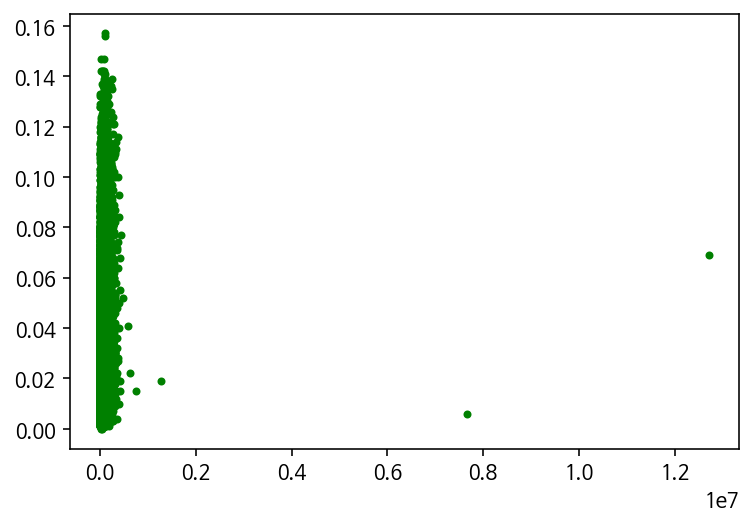

In [ ]:
plt.plot(linear_df['particles'],linear_df['O3'],'g.')

In [ ]:
y = linear_df['O3']
features_col = linear_df.drop(['O3'], axis=1).columns
X = linear_df.drop(['O3'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(35652, 11)
(8913, 11)
(35652,)
(8913,)


In [ ]:
# Create linear regression object
regr = LinearRegression(n_jobs=-1, normalize=True)

# Imputation
my_imputer = SimpleImputer()
x_train_imputed = my_imputer.fit_transform(x_train)
x_test_imputed = my_imputer.fit_transform(x_test)

# Train the model using the training sets
regr.fit(x_train_imputed, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The mean squared error
print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred))
      
# Explained variance score: 1 is perfect prediction
print('Variance R2 score: %.8f' % r2_score(y_test, y_pred))

Mean squared error: 0.00029068
Variance R2 score: 0.31546692


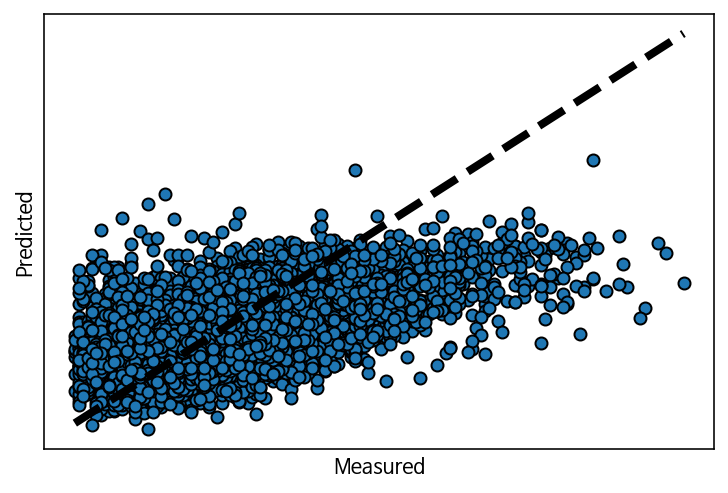

In [ ]:
# Plot outputs
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score: ', r2_score(y_test, y_pred))

MAE: 0.013333040040406573
MSE: 0.0002906838864951548
RMSE: 0.01704945414068013
R2 score:  0.31546691928462023


데이터 프레임이 7월 1일부터 30일이 계속 반복되다보니 값이 잘 안나오는것 갔습니다.

지점 : 7월\
지점 : 7월\
지점 : 7월\
지점 : 7월\
.\
.\
.\
.

---
---
---
---

---
---
---
---

그래서 위의 44437길이의 데이터를 7월 평균으로 묶어서 (한달 길이) 744길이의 데이터 로 만들어서 적용해 보았습니다.

In [ ]:
lin_df = final_df.copy()
# 필요없는 컬럼 삭제
lin_df.drop(['loc', '측정일시','지역', '망', '측정소명', '주소','측정소코드', 'PM25'], axis=1, inplace=True)

lin_df = lin_df.sort_values(by='date')

lin_df.fillna(method='pad', inplace=True)

# lin_df['day'] = lin_df.date.dt.day
# lin_df['hour'] = lin_df.date.dt.hour
lin_df = lin_df.groupby('date').mean()

입자갯수와 오존 분포

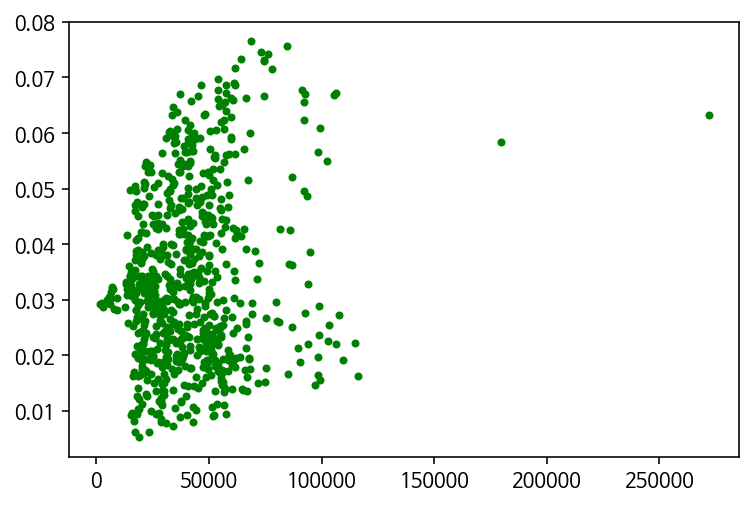

In [ ]:
plt.plot(lin_df['particles'],lin_df['O3'],'g.')

7월 1시간단위 데이터입니다.

In [ ]:
lin_df

,temp,Humid,pressure,win_sp,wind_dire,max_win_sp,particles,SO2,CO,O3,NO2,PM10
date,,,,,,,,,,,,
2021-07-01 00:00:00,21.713672,86.233729,988.156045,0.401751,196.753559,1.085537,67372.355352,0.002686,0.447458,0.023271,0.015163,35.881356
2021-07-01 01:00:00,21.454294,87.397175,988.251299,0.319153,150.171356,1.003051,66630.625716,0.002671,0.432203,0.021271,0.013510,34.898305
2021-07-01 02:00:00,21.217514,88.351186,988.107119,0.364689,132.951243,0.996497,62140.824892,0.002569,0.437288,0.019525,0.012625,35.355932
2021-07-01 03:00:00,20.995819,89.526949,987.803107,0.442655,146.995424,1.180508,65887.379776,0.002434,0.440678,0.017271,0.013368,34.033898
2021-07-01 04:00:00,20.707853,90.187175,987.824972,0.418418,132.241864,1.122034,67099.751909,0.002469,0.435593,0.016186,0.012705,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-31 19:00:00,28.389831,73.568362,981.127401,0.618362,232.795480,2.179944,27469.078797,0.002680,0.415254,0.047305,0.011254,20.915254
2021-07-31 20:00:00,27.628814,75.514689,981.814407,0.452260,230.507345,1.582486,26688.752212,0.002612,0.432203,0.042949,0.011386,19.491525
2021-07-31 21:00:00,27.279435,77.198927,981.899096,0.396667,220.304181,1.295989,29566.413420,0.002576,0.430508,0.040085,0.011734,20.186441


In [ ]:
y = lin_df['O3']
features_col = lin_df.drop(['O3'], axis=1).columns
X = lin_df.drop(['O3'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(595, 11)
(149, 11)
(595,)
(149,)


In [ ]:
# Create linear regression object
regr = LinearRegression(n_jobs=-1, normalize=True)

# Imputation
my_imputer = SimpleImputer()
x_train_imputed = my_imputer.fit_transform(x_train)
x_test_imputed = my_imputer.fit_transform(x_test)

# Train the model using the training sets
regr.fit(x_train_imputed, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The mean squared error
print("MSE: %.8f" % mean_squared_error(y_test, y_pred))
      
# Explained variance score: 1 is perfect prediction
print('R2 score:', r2_score(y_test, y_pred))

from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 0.00005113
R2 score: 0.7992854153100288
MAE: 0.005519496478607901
RMSE: 0.007150720813893999


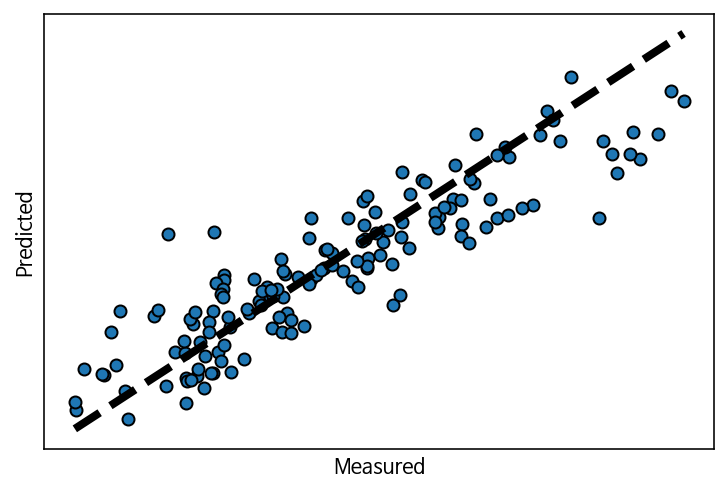

In [ ]:
# Plot outputs
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.xticks(())
plt.yticks(())

plt.show()

처음에 해보려고 했던 BVOC입자량이 오존을 예측할 수 있는지 확인해보겠습니다.

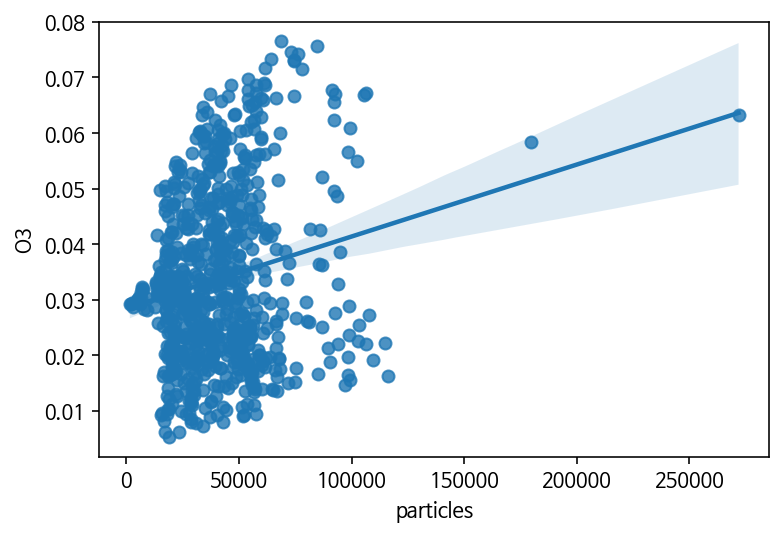

In [ ]:
# 예측하지 못합니다.
# Plot를 보니 이상치가 있어서 그런것 같습니다.
sns.regplot(x='particles', y='O3', data=lin_df)

---
---
---
---

---
---
---
---

이상치를 제거하고 확인해보겠습니다.

In [ ]:
del_Outlier = final_df.copy()
# 필요없는 컬럼 삭제
del_Outlier.drop(['loc', '측정일시','지역', '망', '측정소명', '주소','측정소코드', 'PM25'], axis=1, inplace=True)

del_Outlier = del_Outlier.sort_values(by='date')

del_Outlier.fillna(method='pad', inplace=True)

# del_Outlier['day'] = del_Outlier.date.dt.day
# del_Outlier['hour'] = del_Outlier.date.dt.hour
del_Outlier = del_Outlier.groupby('date').mean()

In [ ]:
# 시간데이터가 있으면 작동을 안하여 제거하겠습니다.
del_Outlier.reset_index(drop=True, inplace=True)

In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
oulier_idx = get_outlier(df=del_Outlier, column='particles', weight=1.5)
del_Outlier.drop(oulier_idx, axis=0, inplace=True)

In [ ]:
y = del_Outlier['O3']
features_col = del_Outlier.drop(['O3'], axis=1).columns
X = del_Outlier.drop(['O3'], axis=1)

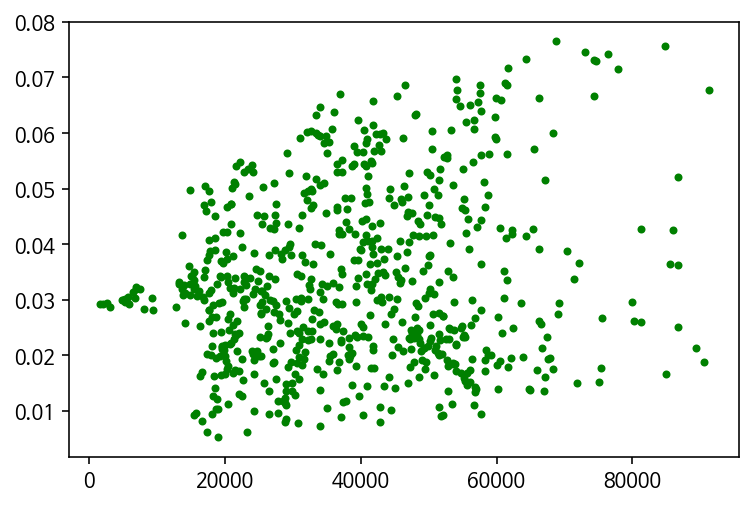

In [ ]:
plt.plot(del_Outlier['particles'],del_Outlier['O3'],'g.')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(572, 11)
(143, 11)
(572,)
(143,)


In [ ]:
# Create linear regression object
regr = LinearRegression(n_jobs=-1, normalize=True)

# Imputation
my_imputer = SimpleImputer()
x_train_imputed = my_imputer.fit_transform(x_train)
x_test_imputed = my_imputer.fit_transform(x_test)

# Train the model using the training sets
regr.fit(x_train_imputed, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The mean squared error
print("MSE: %.8f" % mean_squared_error(y_test, y_pred))
      
# Explained variance score: 1 is perfect prediction
print('R2 score:', r2_score(y_test, y_pred))

from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 0.00004549
R2 score: 0.8257376368562968
MAE: 0.005650513889829378
RMSE: 0.00674499085531022


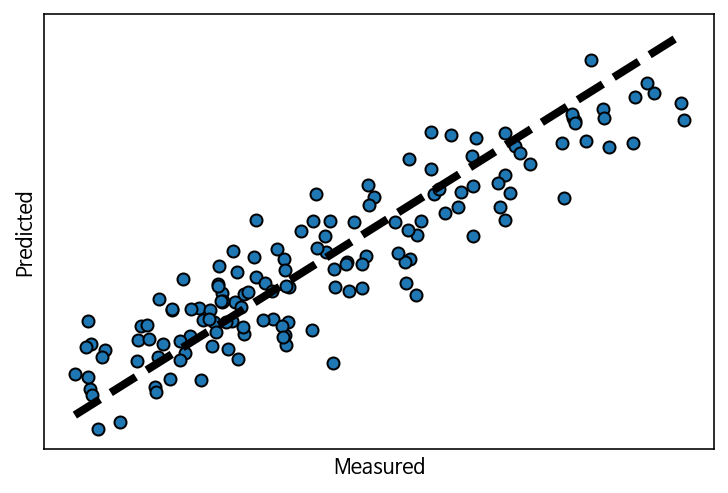

In [ ]:
# Plot outputs
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

plt.xticks(())
plt.yticks(())

plt.show()

확실히 이상치를 제거하니 r2스코어도 올라가고 전보다는 O3(오존) 예측이 더 나아졌습니다.

R2 score: 0.8257376368562968


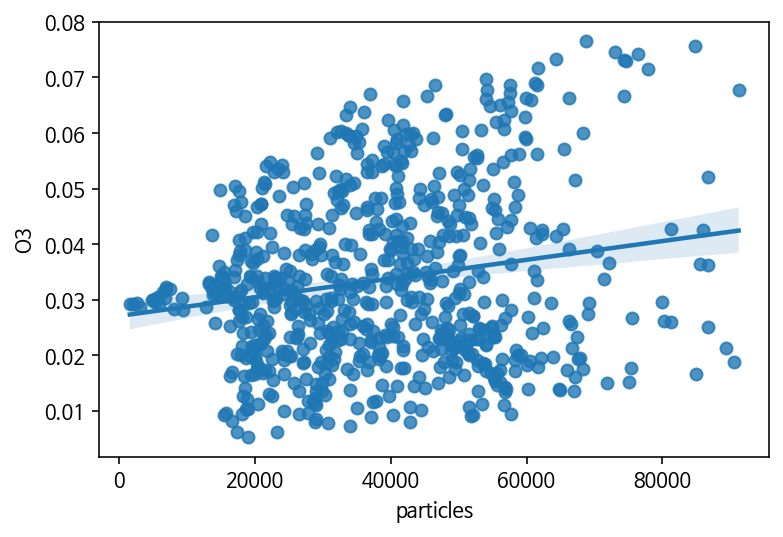

In [ ]:
print('R2 score:', r2_score(y_test, y_pred))
sns.regplot(x='particles', y='O3', data=del_Outlier)

국소 회귀 기법

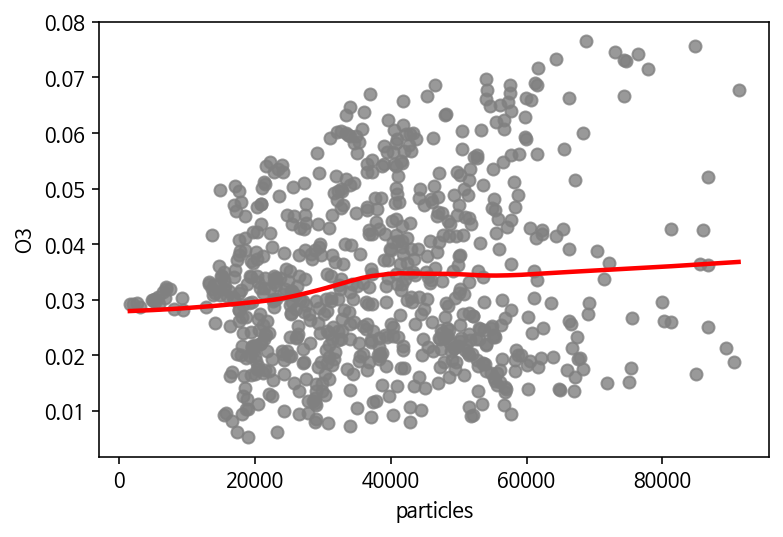

In [ ]:
sns.regplot(x='particles', y='O3', lowess=True, data=del_Outlier,
            line_kws={'color': 'red'}, scatter_kws={'color': 'grey'})

---
---
---
---

---
---
---
---

In [ ]:
#통계기법 활용 라이브러리
import statsmodels.api as sm
x_data = del_Outlier.drop(["O3"], axis=1) #변수 여러개
target = del_Outlier["O3"]
#for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")
#OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     272.3
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          7.78e-245
Time:                        06:22:58   Log-Likelihood:                 2565.7
No. Observations:                 715   AIC:                            -5107.
Df Residuals:                     703   BIC:                            -5053.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1372      0.065     -2.107      0.035      -0.265      -0.009
temp           0.0005      0.000      2.180      0.030    4.55e-05       0.001
Humid         -0.0008   5.88e-05    -14.208      0.000      -0.001      -0.001
pressure       0.0002   6.49e-05      2.606      0.009    4.17e-05       0.000
win_sp        -0.0006      0.000     -2.490      0.013      -0.001      -0.000
wind_dire      0.0002   1.06e-05     17.128      0.000       0.000       0.000
max_win_sp     0.0071      0.000     15.311      0.000       0.006       0.008
particles   2.472e-07   3.51e-08      7.034      0.000    1.78e-07    3.16e-07
SO2           -8.1678      1.654     -4.937      0.000     -11.416      -4.919
CO             0.1141      0.012      9.501      0.000       0.091       0.138
NO2           -0.9739      0.105     -9.260      0.000      -1.180      -0.767
PM10          -0.0002   9.83e-05     -2.367      0.018      -0.000   -3.97e-05
==============================================================================
Omnibus:                        0.360   Durbin-Watson:                   0.322
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.229
Skew:                          -0.000   Prob(JB):                        0.892
Kurtosis:                       3.088   Cond. No.                     2.77e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

일반적으로, 다중공선성 값이 5 이상이면 해당변수가 다른 변수와 상관관계가 높아 변수의 회귀계수 추정을 어렵게 하여 위험하며, 10 이상이면‘매우위험’이라고 알려져 있습니다.

 공선성이 높은 feature들이 있습니다. 저는 10을 기준으로 생각하고 가장 큰 Humid feature만 제거하고 다시 보겠습니다.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
#사실 모든 통계기법이 statsmodels 모듈에 존재하여 
#이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data1.values, i) for i in range(x_data1.shape[1])]
vif["features"] = x_data1.columns
vif

,VIF Factor,features
0,66622.387900,const
1,6.366156,temp
2,7.060896,Humid
3,1.625244,pressure
4,1.392777,win_sp
5,1.522238,wind_dire
6,2.184463,max_win_sp
7,5.513399,particles
8,2.241511,SO2
9,4.522920,CO


In [ ]:
re_x_data = del_Outlier.drop(["O3","Humid"], axis=1)
target = del_Outlier["O3"]
#for b0, 상수항 추가
x_data1 = sm.add_constant(re_x_data, has_constant = "add")
#OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          1.28e-207
Time:                        06:22:58   Log-Likelihood:                 2475.5
No. Observations:                 715   AIC:                            -4929.
Df Residuals:                     704   BIC:                            -4879.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0743      0.074     -1.009      0.313      -0.219       0.070
temp           0.0026      0.000     16.052      0.000       0.002       0.003
pressure       -2e-05    7.2e-05     -0.278      0.781      -0.000       0.000
win_sp        -0.0018      0.000     -7.251      0.000      -0.002      -0.001
wind_dire      0.0001    1.1e-05     10.993      0.000    9.94e-05       0.000
max_win_sp     0.0101      0.000     21.667      0.000       0.009       0.011
particles   1.194e-07   3.85e-08      3.100      0.002    4.38e-08    1.95e-07
SO2           -5.5657      1.864     -2.986      0.003      -9.226      -1.906
CO             0.0909      0.013      6.740      0.000       0.064       0.117
NO2           -0.6951      0.117     -5.933      0.000      -0.925      -0.465
PM10           0.0002      0.000      2.012      0.045    5.17e-06       0.000
==============================================================================
Omnibus:                        0.876   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.645   Jarque-Bera (JB):                0.718
Skew:                          -0.027   Prob(JB):                        0.698
Kurtosis:                       3.145   Cond. No.                     2.75e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

다중공선성이 가장 높은 feature를 삭제하니 다른 값들도 같이 내려갔습니다.

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data1.values, i) for i in range(x_data1.shape[1])]
vif["features"] = x_data1.columns
vif

,VIF Factor,features
0,66314.682394,const
1,3.005148,temp
2,1.556843,pressure
3,1.208537,win_sp
4,1.275515,wind_dire
5,1.724854,max_win_sp
6,5.152020,particles
7,2.214043,SO2
8,4.439415,CO
9,2.434650,NO2


다시모델적용

In [ ]:
from sklearn.model_selection import train_test_split
x = re_x_data
y = target
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression(n_jobs=-1, normalize=True)
mlr.fit(x_train, y_train) 

LinearRegression(n_jobs=-1, normalize=True)

In [ ]:
my_predict = mlr.predict(x_test)
my_predict

array([0.05504703, 0.03269728, 0.06070774, 0.04878995, 0.02548811,
       0.03947089, 0.0498753 , 0.03924411, 0.04851364, 0.06274451,
       0.04659848, 0.03525933, 0.02278755, 0.0341042 , 0.03030187,
       0.05421108, 0.03200617, 0.02685458, 0.05359459, 0.04013552,
       0.03486029, 0.06208994, 0.03450845, 0.01245519, 0.05261846,
       0.03623133, 0.05325891, 0.01364196, 0.02258125, 0.05021093,
       0.04909634, 0.01290524, 0.03060964, 0.05054761, 0.01781903,
       0.04722166, 0.03707388, 0.03002896, 0.0183797 , 0.04063878,
       0.05889851, 0.02975268, 0.05178571, 0.01826242, 0.03742727,
       0.0517713 , 0.02710519, 0.04906101, 0.01487233, 0.05288412,
       0.0135464 , 0.02143997, 0.02559684, 0.04662596, 0.0440421 ,
       0.03408828, 0.02448349, 0.02253959, 0.03446709, 0.05194632,
       0.01577581, 0.04965328, 0.02280297, 0.04360928, 0.03272612,
       0.02280838, 0.02726675, 0.05415521, 0.03465707, 0.03449438,
       0.0503478 , 0.02207014, 0.03876621, 0.02624696, 0.02698

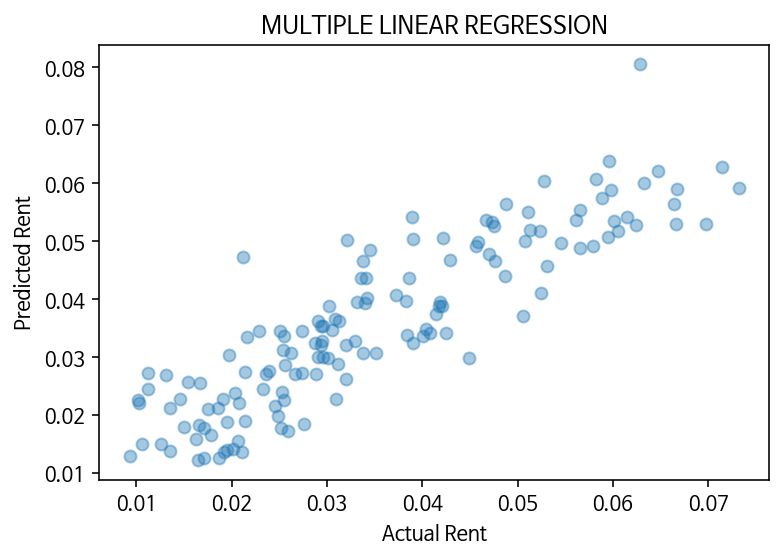

In [ ]:
y_predict = mlr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

다중공선성 기준을 높게 잡으면 아까처럼 r2 score가 0.8 이상 나오겠습니다.

In [ ]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, my_predict))
print('MSE:', metrics.mean_squared_error(y_test, my_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, my_predict)))
print('R2 score: ', r2_score(y_test, my_predict))
print('model score : ', mlr.score(x_test, y_test))

MAE: 0.006038828258578355
MSE: 5.654512361809783e-05
RMSE: 0.007519649168551537
R2 score:  0.7798228341093766
model score :  0.7798228341093766


---
---
---
---

처음에는 만들어진 데이터를 가지고 선형회귀 말고도 randomforestregressor도 되는지

적용해보았는데 잘 안되어서 선형회귀모델만 적용했습니다.



만들어진 데이터로 더 많은 시도를 해보지 못한 점이 아쉽습니다.

다음에는 여러 논문에 나온 내용처럼 기계학습 알고리즘인 

Artificial Neural Network (ANN)인공 신경망 알고리즘과 

K-Nearest Neighbor (K-NN)알고리즘을 상호 응용하여 수치를 예측해보고 싶습니다.

---
---
---
---